## Question

[Neural Network Design] Implement a fully-connected neural network consisting of one input layer, one hidden layer, and one output layer. Use ‘sigmoid’ as an activation function. Do not use any bias term in the network. Use the following default settings unless otherwise specified.
• The input layer size, hidden layer size, and output layer size are given by 2, 8, and 1, respectively.
• The stochastic gradient descent (SGD) optimizer is used for the weight updates by assuming that the batch size is 1.
• The learning rate is fixed to 0.01.
Do NOT use any machine learning package except for some libraries such as Numpy and matplotlib.
(a) (30 points) Plot the training loss (with respect to the mean squared error per epoch) versus the number of epochs using the file “training.txt” for the training dataset. At the same time, plot the validation loss (with respect to the mean squared error per epoch) versus the number of epochs using another file “test.txt” for the validation dataset. That is, validate your trained model for every epoch. Make discussions based on your experimental results by comparing the training loss with the validation loss. You may shuffle data samples in the training and validation sets to impose more randomness.
(b) (30 points) Plot the training loss (with respect to the mean squared error per epoch) according to different hidden layer sizes, ranging from 2 to 16, after training your model sufficiently for each case. Make discussions based on your experimental results. You may shuffle data samples in the training set to impose more randomness.
(c) (40 points) Instead of the SGD, use the adaptive gradient (Adagrad) optimizer, where the (initial) learning rate is set to 0.01. Plot the training loss (with respect to the mean squared error per epoch) versus the number of epochs. Make discussions based on your experimental results. You may shuffle data samples in the training set to impose more randomness.
Refer to the link for the detailed description of Adagrad: https://ruder.io/optimizing-gradient-descent/.

## (a) solution

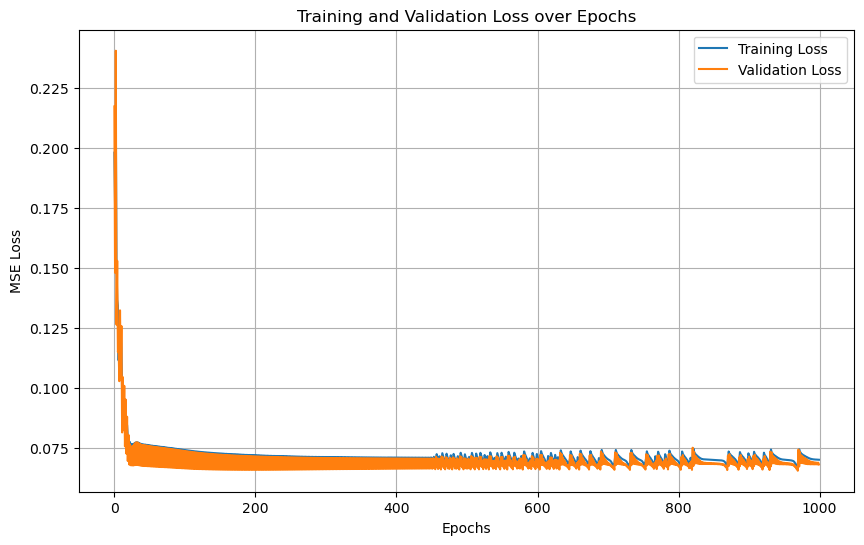

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
def load_data(filepath):
    data = np.genfromtxt(filepath, delimiter=None)  #공백, 탭 구분된 데이터 처리
    X = data[:, :2]
    y = data[:, 2].reshape(-1, 1)
    return X, y

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#sigmoid function 미분
def sigmoid_d(x):
    return x * (1 - x)

#MSE 손실 함수
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#신경망
class NeuralNetwork:
    def __init__(self):
        #input layer's size: 2, hidden layer's size: 8, output layer's size: 1
        self.w1 = np.random.randn(2, 8) #w1: input -> hidden layer의 가중치
        self.w2 = np.random.randn(8, 1) #w2: hidden -> ouput layer의 가중치
        self.learning_rate = 0.01

    #순전파(input -> hidden -> ouput)
    def forward(self, inputs):
        self.hidden = sigmoid(np.dot(inputs, self.w1)) #input과 w1의 값들을 곱해서 더함
        output = sigmoid(np.dot(self.hidden, self.w2)) #hidden과 w2의 값들을 곱해서 더함
        return output

    #역전파
    def backpropagation(self, inputs, y, output):
        output_error = y - output #output layer 오차 계산(실제값과 예측값 차이)
        output_delta = output_error * sigmoid_d(output) #ouput layer 오차 신호 계산(오차에 시그모이드 함수 미분값)

        hidden_error = np.dot(output_delta, self.w2.T) #hidden layer 오차 계산(출력층의 오차 신호를 가중치를 통해 역전파)
        hidden_delta = hidden_error * sigmoid_d(self.hidden) #hidden layer 오차 신호 계산(hidden layer 오차에 시그모이드 함수 미분값)

        self.w2 += np.dot(self.hidden.T, output_delta) * self.learning_rate #output layer 가중치 업데이트(hidden layer 출력과 output layer의 오차 신호 곱셈)
        self.w1 += np.dot(inputs.T, hidden_delta) * self.learning_rate #hidden layer 가중치 업데이트(input layer 출력과 hidden layer의 오차 신호 곱셈)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backpropagation(X, y, output)


#데이터 로딩(training.txt, test.txt는 이 파일의 위치와 같은 경로에 있다고 가정)
training_X, training_y = load_data('training.txt')
test_X, test_y = load_data('test.txt')

#모델 생성
model = NeuralNetwork()
epochs = 1000
training_losses = []
test_losses = []

for epoch in range(epochs):
    model.train(training_X, training_y, 1)
    #loss를 저장
    training_loss = mse_loss(training_y, model.forward(training_X))
    test_loss = mse_loss(test_y, model.forward(test_X))
    #training loss와 test loss를 각 배열에 저장
    training_losses.append(training_loss)
    test_losses.append(test_loss)

#손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

## (b) solution

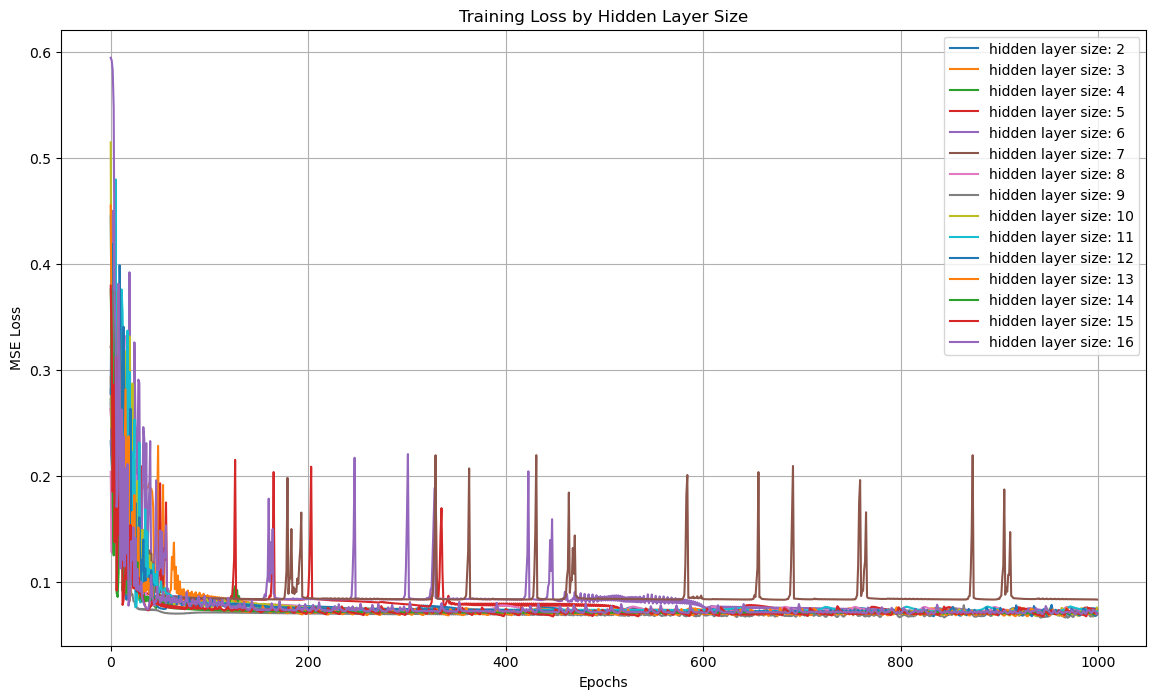

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
def load_data(filepath):
    data = np.genfromtxt(filepath, delimiter=None)  #공백, 탭 구분된 데이터 처리
    X = data[:, :2]
    y = data[:, 2].reshape(-1, 1)
    return X, y

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#sigmoid function 미분
def sigmoid_d(x):
    return x * (1 - x)

#MSE 손실 함수
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#신경망
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size) #w1: input -> hidden layer의 가중치
        self.w2 = np.random.randn(hidden_size, output_size) #w2: hidden -> ouput layer의 가중치
        self.learning_rate = 0.01

    #순전파(input -> hidden -> ouput)
    def forward(self, inputs):
        self.hidden = sigmoid(np.dot(inputs, self.w1)) #input과 w1의 값들을 곱해서 더함
        output = sigmoid(np.dot(self.hidden, self.w2)) #hidden과 w2의 값들을 곱해서 더함
        return output

    #역전파
    def backpropagation(self, inputs, y, output):
        output_error = y - output #output layer 오차 계산(실제값과 예측값 차이)
        output_delta = output_error * sigmoid_d(output) #ouput layer 오차 신호 계산(오차에 시그모이드 함수 미분값)
        
        hidden_error = output_delta.dot(self.w2.T) #hidden layer 오차 계산(출력층의 오차 신호를 가중치를 통해 역전파)
        hidden_delta = hidden_error * sigmoid_d(self.hidden) #hidden layer 오차 신호 계산(hidden layer 오차에 시그모이드 함수 미분값)
        
        self.w2 += np.dot(self.hidden.T, output_delta) * self.learning_rate #output layer 가중치 업데이트(hidden layer 출력과 output layer의 오차 신호 곱셈)
        self.w1 += np.dot(inputs.T, hidden_delta) * self.learning_rate #hidden layer 가중치 업데이트(input layer 출력과 hidden layer의 오차 신호 곱셈)

    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = mse_loss(y, output)
            self.backpropagation(X, y, output)
            losses.append(loss)
        return losses

#데이터 로딩(training.txt는 이 파일의 위치와 같은 경로에 있다고 가정)
training_X, training_y = load_data('training.txt')

#hidden layer 크기
hidden_layer_sizes = range(2, 17)  #2~16 hidden layer size
epochs = 1000

plt.figure(figsize=(14, 8))
for hidden_size in hidden_layer_sizes:
    #모델 생성
    model = NeuralNetwork(input_size=2, hidden_size=hidden_size, output_size=1)
    #loss를 저장
    losses = model.train(training_X, training_y, epochs)
    plt.plot(losses, label=f'hidden layer size: {hidden_size}')

#손실 시각화
plt.title('Training Loss by Hidden Layer Size')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


## (c) solution

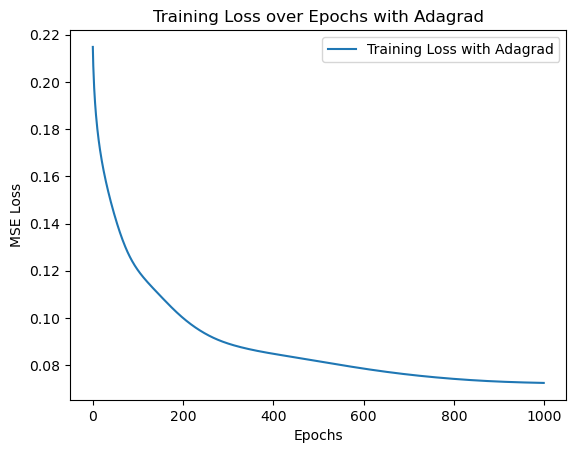

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 로드
def load_data(filepath):
    data = np.genfromtxt(filepath, delimiter=None)  #공백, 탭 구분된 데이터 처리
    X = data[:, :2]
    y = data[:, 2].reshape(-1, 1)
    return X, y

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#sigmoid function 미분
def sigmoid_d(x):
    return x * (1 - x)

#MSE 손실 함수
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

#Adagrad 알고리즘을 사용한 신경망
class NeuralNetwork:
    def __init__(self, input_size=2, hidden_size=8, output_size=1):
        self.w1 = np.random.randn(input_size, hidden_size) #w1: input -> hidden layer의 가중치
        self.w2 = np.random.randn(hidden_size, output_size) #w2: hidden -> ouput layer의 가중치
        self.learning_rate = 0.01
        #Adagrad를 위한 가중치 업데이트 누적 제곱 그래디언트 저장
        self.gradient_accumulate_input_hidden = np.zeros_like(self.w1)
        self.gradient_accumulate_hidden_output = np.zeros_like(self.w2)

    #순전파(input -> hidden -> ouput)
    def forward(self, inputs):
        self.inputs = inputs
        self.hidden = sigmoid(np.dot(inputs, self.w1))
        self.output = sigmoid(np.dot(self.hidden, self.w2))
        return self.output

    #역전파(output -> input)
    def backpropagation(self, y):
        output_error = y - self.output #output layer 오차 계산(실제값과 예측값 차이)
        output_delta = output_error * sigmoid_d(self.output) #ouput layer 오차 신호 계산(오차에 시그모이드 함수 미분값)

        hidden_error = output_delta.dot(self.w2.T) #hidden layer 오차 계산(출력층의 오차 신호를 가중치를 통해 역전파)
        hidden_delta = hidden_error * sigmoid_d(self.hidden) #hidden layer 오차 신호 계산(hidden layer 오차에 시그모이드 함수 미분값)

        gradient_hidden_output = self.hidden.T.dot(output_delta) #output layer 기울기
        gradient_input_hidden = self.inputs.T.dot(hidden_delta) #hidden layer 기울기

        #Adagrad 업데이트
        self.gradient_accumulate_hidden_output += gradient_hidden_output ** 2
        self.gradient_accumulate_input_hidden += gradient_input_hidden ** 2

        #가중치 업데이트
        self.w2 += (self.learning_rate / (np.sqrt(self.gradient_accumulate_hidden_output) + 1e-7)) * gradient_hidden_output
        self.w1 += (self.learning_rate / (np.sqrt(self.gradient_accumulate_input_hidden) + 1e-7)) * gradient_input_hidden

    def train(self, X, y, epochs):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            #loss를 저장
            loss = mse_loss(y, output)
            self.backpropagation(y)
            losses.append(loss)
        return losses

#데이터 로딩(training.txt는 이 파일의 위치와 같은 경로에 있다고 가정)
X_train, y_train = load_data('training.txt')

#모델 생성
model = NeuralNetwork()
epochs = 1000
losses_adagrad = model.train(X_train, y_train, epochs)

# 손실 시각화
plt.plot(losses_adagrad, label='Training Loss with Adagrad')
plt.title('Training Loss over Epochs with Adagrad')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()